## РК 1 
### Викулин И.С. РТ5-61Б Вариант 4
Задание: 
Задача 1. 
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.
Heart Disease Dataset:
Attribute Information:
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Целевым признаком в этом наборе данных является "target". Этот признак указывает на наличие или отсутствие сердечного заболевания у пациента и принимает два значения: 0 (нет заболевания) и 1 (есть заболевание).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

Загрузим датасет

In [2]:
data = pd.read_csv('heart.csv')

Выведем размерность датасета

In [6]:
data.shape

(1025, 14)

Вывдем типы колонок

In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Проверим пропуски

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Следовательно, пропусков нет

Первые 5 строк

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Корреляционный анализ

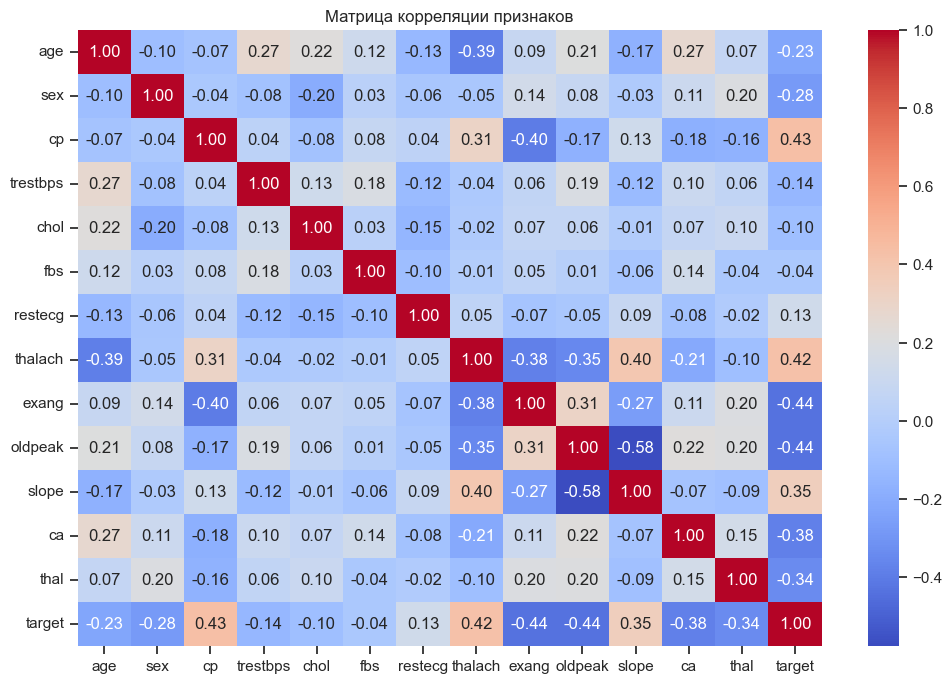

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляции признаков")
plt.show()

Целевой признак target (отсутствие или присутствие заболевание) слабо коррелирует (коэф. корр. ∈ [0.3; 0.5]) со следующими признаками:
- cp (тип боли в груди) коэф. корр. = 0.43
- thalach (максимальная частота сердечных сокращений) коэф. корр. = 0.42
- exang (появление стенокардии при физ. нагрузке) коэф. корр. = -0.44
- oldpeak (депрессия сегмента ST, вызванная физической нагрузкой относительно состояния покоя) коэф. корр. = -0.44
- slope (наклон пика сегмента ST при максимальной физической нагрузке) коэф. корр. = 0.35 
- ca (Количество основных сосудов, окрашенных флуороскопией) коэф. корр. = -0.38
- thal (талассемия, тип дефекта) коэф. корр. = -0.34

chol (уровень холестерина в крови), trestbps (артериальное давление в состоянии покоя), fbs (уровень сахара в крови натощак). У этих признаков коэф. корр. близки к 0, поэтому ими можно пренебречь при построении модели.

cp (тип боли в груди) и exang (появление стенокардии при физ. нагрузке). У этих признаков коэф. корр. между собой составляет -0.44. Это может указывать на то, что эти признаки могут предоставлять схожую информацию о состоянии пациента. Аналогично с exang - thalach; oldpeak - slope;  thalach - slope и т.п. => можно рассмотреть возможность удаление некоторых из этих признаков для уменьшения размерности данных и избежания избыточности информации в модели. 

### Уберем искуственные пропуски из датасета-копии

Создадим датасет heart_with_spaces.csv, куда добавим искуственные пропуски и избавимся от их

In [3]:
data_with_spaces = pd.read_csv('heart_with_spaces.csv', sep=",")

In [5]:
data_with_spaces.shape

(1025, 14)

In [6]:
data_with_spaces.isnull().sum()

age         0
sex         2
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Видим, что есть пропуски. 

Удалим строки

In [8]:
data_new_1 = data_with_spaces.dropna(axis=0, how='any')
(data_with_spaces.shape, data_new_1.shape)

((1025, 14), (1019, 14))

Удалим колонки 

In [10]:
data_new_2 = data_with_spaces.dropna(axis=1, how='any')
(data_with_spaces.shape, data_new_2.shape)

((1025, 14), (1025, 11))

### Дополнительное задание - построение графика Jointplot для произвольной пары колонок

Построим график для 2х колонок: возраст - макс. частота сердечных сокращений

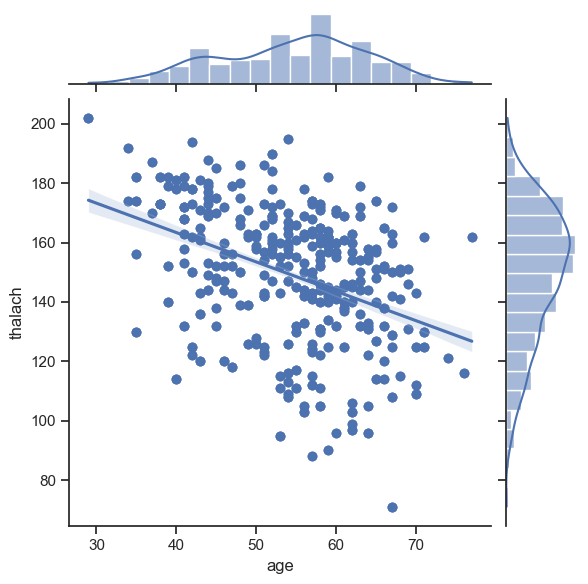

In [29]:
sns.jointplot(x="age", y="thalach", data=data, kind="reg")
plt.show()